In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [12]:
from sklearn import preprocessing as pp
scaler1 = pp.MinMaxScaler(feature_range=(0, 1))
y = df.soybean.values.reshape(len(df.soybean.values), 1)
scaler1 = scaler1.fit(y)
y = scaler1.transform(y)

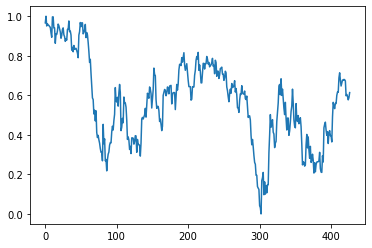

In [13]:
plt.plot(y)

## March2020

In [14]:
## data preprocessing
data = pd.read_csv('spooky13_no_weekends.csv')
data=data.rename(columns = {'Unnamed: 0':'date'})
data = data.set_index('date')

df = data[pd.notnull(data['close_march2020_soybean'])].dropna(axis='columns', how='all')
df = df.rename(columns = {'close_march2020_soybean':'soybean', 'close_march2020_corn': 'corn'})

# fillna for tariff, trade_tweets, and economy_tweets
for col in ['tariff', 'tweets']:
    df[col] = df[col].fillna(0)

# remove missing columns
rm_list = df.columns[df.isnull().any()]
df = df.drop(columns = rm_list)

# get rid of the last five rows
df = df.drop(df.index[-5:])

In [15]:
## get the shifted datasets
# df_base is the base dataframe
df_lag = [None]*5
append_list = ['2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08']
df_base = df.copy()
for i in range(5):
    df_lag[i] = df_base.copy().append(pd.DataFrame(index=append_list[:(i+1)]))
    for col in df_lag[i].columns:
        df_lag[i][col] = df_lag[i][col].shift(i+1)
    df_lag[i]['soybean'] = df_base['soybean']
    df_lag[i] = df_lag[i].drop(df_lag[i].index[:(i+1)])

In [26]:
df5_lag = [None]*5
for i in range(5):
    df5_lag[i] = df_lag[i].drop(df_lag[i].index[-5:])

In [34]:
## functions to get cv results and prediction
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import TimeSeriesSplit 
from xgboost import XGBRegressor 
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
tscv = TimeSeriesSplit(n_splits=5)

lr = LinearRegression()
ridge = RidgeCV(cv=tscv)
lasso = LassoCV(cv=tscv)
xgb = XGBRegressor(verbosity=0)

## prediction
def pred(lag, model):
    scaler = StandardScaler()

    y_train = df5_lag[lag-1].drop(df5_lag[lag-1].index[-lag:])['soybean']
    X_train = df5_lag[lag-1].drop(df5_lag[lag-1].index[-lag:]).drop(['soybean'], axis=1)

    X_test = df5_lag[lag-1].drop(['soybean'], axis=1)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # fit model
    mdl = model.fit(X_train_scaled, y_train)

    # predict using model
    preds = mdl.predict(X_test_scaled)[-1]
    return preds

In [35]:
# prediction for 10-28 -- 11-01
lasso = LassoCV(cv=tscv)
xgb = XGBRegressor(verbosity=0)
prediction = [pred(1, lasso), pred(2, xgb), pred(3, xgb), pred(4, lasso), pred(5, lasso)]
print(prediction)

[932.0632054874144, 947.974, 928.44806, 936.6511727550891, 931.5302493618976]


## May2020

In [38]:
## data preprocessing
data = pd.read_csv('spooky13_no_weekends.csv')
data=data.rename(columns = {'Unnamed: 0':'date'})
data = data.set_index('date')

df = data[pd.notnull(data['close_may2020_soybean'])].dropna(axis='columns', how='all')
df = df.rename(columns = {'close_may2020_soybean':'soybean', 'close_may2020_corn': 'corn'})

# fillna for tariff, trade_tweets, and economy_tweets
for col in ['tariff', 'tweets']:
    df[col] = df[col].fillna(0)

# remove missing columns
rm_list = df.columns[df.isnull().any()]
df = df.drop(columns = rm_list)

# get rid of the last five rows
df = df.drop(df.index[-5:])


## get the shifted datasets
# df_base is the base dataframe
df_lag = [None]*5
append_list = ['2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08']
df_base = df.copy()
for i in range(5):
    df_lag[i] = df_base.copy().append(pd.DataFrame(index=append_list[:(i+1)]))
    for col in df_lag[i].columns:
        df_lag[i][col] = df_lag[i][col].shift(i+1)
    df_lag[i]['soybean'] = df_base['soybean']
    df_lag[i] = df_lag[i].drop(df_lag[i].index[:(i+1)])
    
df5_lag = [None]*5
for i in range(5):
    df5_lag[i] = df_lag[i].drop(df_lag[i].index[-5:])

In [39]:
# prediction for 10-28 -- 11-01
lasso = LassoCV(cv=tscv)
xgb = XGBRegressor(verbosity=0)
prediction = [pred(1, lasso), pred(2, xgb), pred(3, xgb), pred(4, lasso), pred(5, lasso)]
print(prediction)

[953.399926882251, 954.717, 945.4929, 952.6924939423069, 953.3720812035084]


## July 2020

In [40]:
## data preprocessing
data = pd.read_csv('spooky13_no_weekends.csv')
data=data.rename(columns = {'Unnamed: 0':'date'})
data = data.set_index('date')

df = data[pd.notnull(data['close_july2020_soybean'])].dropna(axis='columns', how='all')
df = df.rename(columns = {'close_july2020_soybean':'soybean', 'close_july2020_corn': 'corn'})

# fillna for tariff, trade_tweets, and economy_tweets
for col in ['tariff', 'tweets']:
    df[col] = df[col].fillna(0)

# remove missing columns
rm_list = df.columns[df.isnull().any()]
df = df.drop(columns = rm_list)

# get rid of the last five rows
df = df.drop(df.index[-5:])


## get the shifted datasets
# df_base is the base dataframe
df_lag = [None]*5
append_list = ['2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08']
df_base = df.copy()
for i in range(5):
    df_lag[i] = df_base.copy().append(pd.DataFrame(index=append_list[:(i+1)]))
    for col in df_lag[i].columns:
        df_lag[i][col] = df_lag[i][col].shift(i+1)
    df_lag[i]['soybean'] = df_base['soybean']
    df_lag[i] = df_lag[i].drop(df_lag[i].index[:(i+1)])
    
df5_lag = [None]*5
for i in range(5):
    df5_lag[i] = df_lag[i].drop(df_lag[i].index[-5:])

In [41]:
# prediction for 10-28 -- 11-01
lasso = LassoCV(cv=tscv)
xgb = XGBRegressor(verbosity=0)
prediction = [pred(1, lasso), pred(2, xgb), pred(3, xgb), pred(4, lasso), pred(5, lasso)]
print(prediction)

[964.2816323827392, 966.88257, 951.6621, 963.0414858932292, 962.7348681294587]
